<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">
import library
</div>
 




In [7343]:
import pandas as pd
from bs4 import BeautifulSoup
import os
import csv
from itertools import zip_longest
import nest_asyncio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, Binarizer, StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import re
import inflect
from word2number import w2n
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import linregress
import pickle




________________________________________________________________________________________________________

In [7344]:

maping_description = {
        "لون السيارة": 'color',
        "نوع الوقود": 'fuel_type',
        "أصل السيارة": 'origin_car',
        "عداد السيارة": 'car_speedometer',
        "أصحاب سابقون": 'ex_owners',
        "رخصة السيارة": 'car_license',
        "نوع الجير": 'lime_type',
        "الزجاج": 'glass',
        "قوة الماتور": 'motor_power',
        "عدد الركاب": 'passengers',
        "وسيلة الدفع": 'payment_method',
        "معروضة": 'displayed'
    }
maping_additional={
        'جهاز إنذار': 'alarm_devise',
        'مُكيّف': 'air_conditioner',
        'مسجل CD': 'CD_recorder',
        'فتحة سقف': 'sunroof',
        'فرش جلد': 'leather_upholstery',
        'إغلاق مركزي': 'central_closing',
        'جنطات مغنيسيوم': 'magnesium_rims',
        'وسادة حماية هوائية': 'air_cushion',
    } 
fuel_type_mapping = {
    'ديزل': 1,
    'بنزين': 2,
    'هايبرد': 3,
    'كهربا': 4
}#(x-xmin)/(xmax-xmin)
displayed_mapping = {
    'للبيع فقط': 1,
    'للتبديل فقط': 2, 
    'للبيع أو التبديل': 3
}
Limeـtype_mapping = {
    'اوتوماتيك': 3,
    'عادي': 1,
    'نصف اوتوماتيك': 2
}
car_type_mapping = {
    'تدريب سياقة': 3,
    'تجاري': 6  ,
    'حكومي': 1  ,
    'تأجير': 2 , 
    'خصوصي':  4  , 
    'عمومي': 5
}
drivingـlicense = {
    'نمرة صفراء': 2,
    'فلسطينية': 1,
}
payment_method_map = {
    'إمكانية التقسيط': 2,
    'نقدا فقط': 1,
}
glass_map = {
    'الكتروني': 2,
    'يدوي': 1,
}
arabic_brands = ['كيا', 'هونداي', 'بيجو', 'سكودا', 'سوبارو', 'سيت', 'مرسيدس',
                 'اودي', 'فولكسفاجن', 'Dodge', 'اوبل', 'شفروليه', 'فورد', 'فولفو',
                 'ستروين', 'جييب', 'ايسوزو', 'رينو', 'مازدا', 'فيات', 'بي', 'دايو',
                 'أفيكو', 'الفا', 'تويوتا', 'ميتسوبيشي', 'سانغ', 'دراجة', 'جي',
                 'شاحنة', 'هوندا', 'نيسان', 'داف', 'روفر', 'داتشيا', 'لاندروفر',
                 'كاديلاك', 'باص', 'سوزوكي', 'ديهاتسو', 'جاجوار']
english_brands = ['Kia', 'Hyundai', 'Peugeot', 'Skoda', 'Subaru', 'Seat', 'Mercedes',
                  'Audi', 'Volkswagen', 'Dodge', 'Opel', 'Chevrolet', 'Ford', 'Volvo',
                  'Citroen', 'Jeep', 'Isuzu', 'Renault', 'Mazda', 'Fiat', 'BMW', 'Daewoo',
                  'Iveco', 'Alfa Romeo', 'Toyota', 'Mitsubishi', 'SsangYong', 'Motorcycle', 'GMC',
                  'Truck', 'Honda', 'Nissan', 'DAF', 'Rover', 'Dacia', 'Land Rover',
                  'Cadillac', 'Bus', 'Suzuki', 'Daihatsu', 'Jaguar']

brand_dict = dict(zip(arabic_brands, english_brands))
 
results_dict = {
    "4+1": 5 , 
    "5+1" : 6  , 
    "6+1" : 7   , 
    '1+1' : 2 , 
    '2' : 2 , 
    "8+1" : 9 , 
    "2+1" : 3 , 
    "7+1" : 8  , 
    "3+1" : 4 , 
    'اكثر من 10': 10 , 
    '7' :  7 , 
    '6x1' : 7  , 
     '9+1' : 10  , 
     '1+7' : 8 , 
     '7.1' : 8 , 
     '1+4'  : 5 , 
      '8' : 8 , 
      '7,+ 1':  8 ,
        '6±1'  : 7 ,
      '7 =1'  : 8 ,
        '104' : 104 ,
        '22':22 ,
        '4+2' :  7  ,
        '5+2': 7 ,
        '2/1' : 3 
}


________________________________________________________________________________________________________

<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">EDA</p>
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif" style="width: 200px; height: 100px;">
</p>
<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 115px; overflow: hidden; font-weight: 1000; width: 60%;">EDA</div>




In [7345]:
df = pd.read_csv("/Users/macbook/Desktop/project ML/carsData1.csv")

In [7346]:
df

,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,وسيلة الدفع,معروضة,...,leather_upholstery,air_cushion,magnesium_rims,sunroof,التكميلي (جسم المركبة),طرف ثالث,المجموع,name_car,model_car,price_car
0,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,١٨٣٠٠٠,إمكانية التقسيط,للبيع فقط,...,1.0,1.0,0.0,0.0,1340.0,1000.0,2340.0,كيا برايد,موديل سنة 2008,44000.0
1,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400.0,42000,نقدا فقط,للبيع أو التبديل,...,1.0,1.0,1.0,0.0,1035.0,1016.0,2050.0,هونداي اكسنت,موديل سنة 2013,58000.0
2,أسود,بنزين,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2000.0,85000,إمكانية التقسيط,للبيع فقط,...,1.0,1.0,1.0,1.0,1340.0,1000.0,2340.0,بيجو 508,موديل سنة 2013,40000.0
3,أزرق,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900.0,30000,إمكانية التقسيط,للبيع أو التبديل,...,1.0,1.0,1.0,0.0,1340.0,1226.0,2565.0,سكودا اوكتافيا,موديل سنة 2010,70000.0
4,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600.0,NaN,نقدا فقط,للبيع فقط,...,0.0,1.0,1.0,0.0,670.0,500.0,1170.0,سوبارو امبريزا,موديل سنة 1999,33000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,فيات فيات 132,موديل سنة 1973,27000.0
7773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,هونداي سانتافيه,موديل سنة 2016,117000.0
7774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,هونداي اكسنت,موديل سنة 2017,67000.0
7775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,سكودا فابيا,موديل سنة 2015,58000.0


In [7347]:
maping_description.items()
#print maping_description (name col)

dict_items([('لون السيارة', 'color'), ('نوع الوقود', 'fuel_type'), ('أصل السيارة', 'origin_car'), ('عداد السيارة', 'car_speedometer'), ('أصحاب سابقون', 'ex_owners'), ('رخصة السيارة', 'car_license'), ('نوع الجير', 'lime_type'), ('الزجاج', 'glass'), ('قوة الماتور', 'motor_power'), ('عدد الركاب', 'passengers'), ('وسيلة الدفع', 'payment_method'), ('معروضة', 'displayed')])

In [7348]:
 
for col_arabic ,col_english  in maping_description.items():
    print(col_arabic)
    print(col_english)
    print("---------")


لون السيارة
color
---------
نوع الوقود
fuel_type
---------
أصل السيارة
origin_car
---------
عداد السيارة
car_speedometer
---------
أصحاب سابقون
ex_owners
---------
رخصة السيارة
car_license
---------
نوع الجير
lime_type
---------
الزجاج
glass
---------
قوة الماتور
motor_power
---------
عدد الركاب
passengers
---------
وسيلة الدفع
payment_method
---------
معروضة
displayed
---------


In [7349]:
list(maping_description.keys())

['لون السيارة',
 'نوع الوقود',
 'أصل السيارة',
 'عداد السيارة',
 'أصحاب سابقون',
 'رخصة السيارة',
 'نوع الجير',
 'الزجاج',
 'قوة الماتور',
 'عدد الركاب',
 'وسيلة الدفع',
 'معروضة']

In [7350]:
 
for col_arabic, col_english in maping_description.items():
    df[col_english] = df[col_arabic]
df = df.drop(list(maping_description.keys()), axis=1)
df

,الدفع,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,التكميلي (جسم المركبة),...,origin_car,car_speedometer,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed
0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1340.0,...,خصوصي,١٨٣٠٠٠,يد اولى,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,إمكانية التقسيط,للبيع فقط
1,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1035.0,...,خصوصي,42000,يد اولى,فلسطينية,اوتوماتيك,الكتروني,1400.0,4+1,نقدا فقط,للبيع أو التبديل
2,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1340.0,...,خصوصي,85000,يد ثانيه,فلسطينية,نصف اوتوماتيك,الكتروني,2000.0,4+1,إمكانية التقسيط,للبيع فقط
3,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1340.0,...,خصوصي,30000,3,فلسطينية,عادي,الكتروني,1900.0,4+1,إمكانية التقسيط,للبيع أو التبديل
4,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,670.0,...,خصوصي,NaN,NaN,فلسطينية,عادي,الكتروني,1600.0,4+1,نقدا فقط,للبيع فقط
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------





<p style="text-align: center;">
    <img src=" https://media.giphy.com/media/l0HlJIp1dIZzimEBq/giphy.gif" style="width: 200px; height: 100px;">
</p>
<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%;">Understanding data
 </div>






In [7351]:
df.head()
#print the first 5 row 

,الدفع,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,التكميلي (جسم المركبة),...,origin_car,car_speedometer,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed
0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1340.0,...,خصوصي,١٨٣٠٠٠,يد اولى,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,إمكانية التقسيط,للبيع فقط
1,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1035.0,...,خصوصي,42000,يد اولى,فلسطينية,اوتوماتيك,الكتروني,1400.0,4+1,نقدا فقط,للبيع أو التبديل
2,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1340.0,...,خصوصي,85000,يد ثانيه,فلسطينية,نصف اوتوماتيك,الكتروني,2000.0,4+1,إمكانية التقسيط,للبيع فقط
3,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1340.0,...,خصوصي,30000,3,فلسطينية,عادي,الكتروني,1900.0,4+1,إمكانية التقسيط,للبيع أو التبديل
4,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,670.0,...,خصوصي,NaN,NaN,فلسطينية,عادي,الكتروني,1600.0,4+1,نقدا فقط,للبيع فقط


In [7352]:
df.info()
#print information data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   الدفع                   1431 non-null   object 
 1   air_conditioner         6864 non-null   float64
 2   central_closing         6864 non-null   float64
 3   alarm_devise            6864 non-null   float64
 4   CD_recorder             6864 non-null   float64
 5   leather_upholstery      6864 non-null   float64
 6   air_cushion             6864 non-null   float64
 7   magnesium_rims          6864 non-null   float64
 8   sunroof                 6864 non-null   float64
 9   التكميلي (جسم المركبة)  6853 non-null   float64
 10  طرف ثالث                6853 non-null   float64
 11  المجموع                 6853 non-null   float64
 12  name_car                6864 non-null   object 
 13  model_car               6864 non-null   object 
 14  price_car               6864 non-null   

-----


</p>
<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%;">chake if have missing data </div>




In [7353]:
df.isna().sum()

الدفع                     6346
air_conditioner            913
central_closing            913
alarm_devise               913
CD_recorder                913
leather_upholstery         913
air_cushion                913
magnesium_rims             913
sunroof                    913
التكميلي (جسم المركبة)     924
طرف ثالث                   924
المجموع                    924
name_car                   913
model_car                  913
price_car                  913
color                      913
fuel_type                  913
origin_car                 913
car_speedometer           2854
ex_owners                 2563
car_license                913
lime_type                  913
glass                      913
motor_power                913
passengers                1690
payment_method             913
displayed                  913
dtype: int64

----




<p style="text-align: center;">
    <img src=" https://media.giphy.com/media/5WAdRevloGjuw/giphy.gif" style="width: 200px; height: 100px;">
</p>
<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%;">now handling missing data </div>




<div style="padding: 10px; background-color: #E4317F; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> Firstly We will delete the samples that contain lost data because there is a problem with the pages from which the data is collected and the pages have empty content.
</div>


In [7354]:
column_names = ['color', 'fuel_type', 'origin_car','ex_owners', 'glass', 'car_license',  "lime_type", 'glass', 'motor_power', 'passengers', 'payment_method', 'displayed', 'sunroof']
df = df.dropna(subset=column_names, how='all') 

#drop all null data from column ['color', 'fuel_type', 'origin_car','ex_owners', 'glass', 'car_license',  "lime_type", 'glass', 'motor_power', 'passengers', 'payment_method', 'displayed', 'sunroof']


In [7355]:
rows_with_name_nan = df[df['name_car'].isna()]
rows_with_name_nan

,الدفع,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,التكميلي (جسم المركبة),...,origin_car,car_speedometer,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed
23,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1690.0,...,خصوصي,129100,3,فلسطينية,اوتوماتيك,الكتروني,2200.0,4+1,نقدا فقط,للبيع فقط
27,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,670.0,...,خصوصي,75000,يد 4,فلسطينية,عادي,الكتروني,1600.0,4+1,إمكانية التقسيط,للبيع فقط
29,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1035.0,...,خصوصي,NaN,NaN,فلسطينية,عادي,الكتروني,1400.0,4+1,نقدا فقط,للبيع فقط
32,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1340.0,...,خصوصي,NaN,يد اولى,فلسطينية,اوتوماتيك,الكتروني,2000.0,4+1,نقدا فقط,للبيع فقط
52,دفع أمامي,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1035.0,...,خصوصي,70000,٢,فلسطينية,عادي,الكتروني,1400.0,4+1,إمكانية التقسيط,للبيع فقط
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1035.0,...,خصوصي,١٣٠٠٠٠,يد اولى,فلسطينية,عادي,الكتروني,1600.0,4+1,نقدا فقط,للبيع فقط
6854,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,...,تجاري,100000,9,فلسطينية,عادي,يدوي,1900.0,7+1,نقدا فقط,للبيع أو التبديل
6859,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,...,خصوصي,50000,NaN,فلسطينية,عادي,يدوي,1800.0,NaN,نقدا فقط,للبيع فقط
6861,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,...,خصوصي,40,1,فلسطينية,اوتوماتيك,الكتروني,1400.0,4+1,نقدا فقط,للبيع فقط


In [7356]:
column_names=['model_car', 'name_car' , 'fuel_type', 'lime_type', 'motor_power']
df = df.dropna(subset=column_names, how='all')
#drop all null data from ['model_car', 'name_car' , 'fuel_type', 'lime_type', 'motor_power']

In [7357]:
column_names=['model_car', 'name_car',"price_car"]
df = df.dropna(subset=column_names, how='all')
#drop all null data from ['model_car', 'name_car',"price_car"]

In [7358]:
df[df['name_car'].isna()]

,الدفع,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,التكميلي (جسم المركبة),...,origin_car,car_speedometer,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed


In [7359]:
rows_with_name_nan = df[df['name_car'].isna()]
rows_with_name_nan
df.isna().sum()
#check if we have missing data 

الدفع                     4798
air_conditioner              0
central_closing              0
alarm_devise                 0
CD_recorder                  0
leather_upholstery           0
air_cushion                  0
magnesium_rims               0
sunroof                      0
التكميلي (جسم المركبة)       7
طرف ثالث                     7
المجموع                      7
name_car                     0
model_car                    0
price_car                    0
color                        0
fuel_type                    0
origin_car                   0
car_speedometer           1711
ex_owners                 1454
car_license                  0
lime_type                    0
glass                        0
motor_power                  0
passengers                 674
payment_method               0
displayed                    0
dtype: int64

In [7360]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

الدفع                     79.227213
air_conditioner            0.000000
central_closing            0.000000
alarm_devise               0.000000
CD_recorder                0.000000
leather_upholstery         0.000000
air_cushion                0.000000
magnesium_rims             0.000000
sunroof                    0.000000
التكميلي (جسم المركبة)     0.115588
طرف ثالث                   0.115588
المجموع                    0.115588
name_car                   0.000000
model_car                  0.000000
price_car                  0.000000
color                      0.000000
fuel_type                  0.000000
origin_car                 0.000000
car_speedometer           28.252972
ex_owners                 24.009247
car_license                0.000000
lime_type                  0.000000
glass                      0.000000
motor_power                0.000000
passengers                11.129458
payment_method             0.000000
displayed                  0.000000
dtype: float64

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> Because it contains more than 70% of missing values, the column must be deleted ("الدفع" )
</div>


In [7361]:
df = df.drop("الدفع" , axis=1)

-----


<p style="text-align: center;">
    <img src="https://media.giphy.com/media/cjbfyJrICOaKIXBWyG/giphy.gif" style="width: 200px; height: 100px;">
</p>
<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%;">maping column </div>




In [7362]:
df["lime_type"] = df["lime_type"].map(Limeـtype_mapping)
#convert colume  from arbic to english 

In [7363]:
df["car_license"] = df["car_license"].map(drivingـlicense)
#convert colume  from arbic to english 

In [7364]:
#df["fuel_type"] = df["fuel_type"].map(fuel_type_mapping)
#df["fuel_type"].fillna(1, inplace=True)
#df["fuel_type"].unique()


In [7365]:
df["displayed"] = df["displayed"].map(displayed_mapping)
#convert colume  from arbic to english 

In [7366]:
df["payment_method"] = df["payment_method"].map(payment_method_map)
#convert colume  from arbic to english 

In [7367]:
df["glass"] = df["glass"].map(glass_map)
#convert colume  from arbic to english 


In [7368]:
df['passengers'] = df['passengers'].map(results_dict)
#convert colume  from arbic to english 

In [7369]:
df['origin_car'] = df['origin_car'].map(car_type_mapping)
df['origin_car']
#convert colume  from arbic to english 

0       4
1       4
2       4
3       4
4       4
       ..
6856    4
6857    5
6858    4
6860    4
6863    4
Name: origin_car, Length: 6056, dtype: int64

In [7370]:
df["alarm_devise"]= df["alarm_devise"].astype(int)
df["air_conditioner"]= df["air_conditioner"].astype(int)
df["CD_recorder"]= df["CD_recorder"].astype(int)
df["sunroof"]= df["sunroof"].astype(int)
df["leather_upholstery"]= df["central_closing"].astype(int)
df["magnesium_rims"]= df["magnesium_rims"].astype(int)
df["air_cushion"]= df["air_cushion"].astype(int)


# Assuming you have a DataFrame named df
df['price_binary'] = (((df['alarm_devise'].fillna(0).astype(int) & df['air_conditioner'].fillna(0).astype(int) & 
                      df['CD_recorder'].fillna(0).astype(int) & df['sunroof'].fillna(0).astype(int) & 
                      df['leather_upholstery'].fillna(0).astype(int) & df['central_closing'].fillna(0).astype(int) & 
                      df['magnesium_rims'].fillna(0).astype(int) & df['air_cushion'].fillna(0).astype(int)) > 0) & 
                      (df['price_car'] > 62000)).astype(int)


----


<p style="text-align: center;">
    <img src="https://media.giphy.com/media/XGNafjOYE7g88/giphy.gif" style="width: 200px; height: 100px;">
</p>
<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%;">droping column </div>




In [7371]:
df = df.drop("المجموع" , axis=1)
df = df.drop("طرف ثالث" , axis=1)
df = df.drop("التكميلي (جسم المركبة)" , axis=1)
df=df.drop("car_speedometer",axis=1)
df=df.drop("color", axis = 1 )
#df = df.drop("alarm_devise" , axis=1)
#df = df.drop("central_closing" , axis=1)
#df = df.drop("CD_recorder" , axis=1)
#df = df.drop("leather_upholstery" , axis=1)
#df = df.drop("air_cushion" , axis=1) 
#df = df.drop("magnesium_rims", axis=1)
#df = df.drop("air_conditioner", axis=1)

#Delete columns that negatively affect or distort the model


------

<div style="padding: 10px; background-color: #808080; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%;">Firstly you must processing the columns in data To make predict with missing data more accurate </div>



---

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">    processing model cars 
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>


In [7372]:
df["model_car"].describe()

count               6056
unique                53
top       موديل سنة 2014
freq                 500
Name: model_car, dtype: object

In [7373]:
df['model_car'] = df['model_car'].str.extract('(\d+)').astype(float)
df['model_car'] = pd.to_numeric(df['model_car'], errors='coerce', downcast='integer')
df['model_car'] = df['model_car'].astype('int64')
# Converting a model from string  to int 


In [7374]:
df['model_car'].describe()

count    6056.000000
mean     2008.704260
std         8.607808
min      1968.000000
25%      2005.000000
50%      2011.000000
75%      2015.000000
max      2022.000000
Name: model_car, dtype: float64

In [7375]:
def process_outliers(column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > 3)
    df[column] = np.where(outliers, df[column].median(), df[column])

process_outliers('model_car')

In [7376]:
df["model_car"].describe()

count    6056.000000
mean     2009.049207
std         8.053530
min      1983.000000
25%      2006.000000
50%      2011.000000
75%      2015.000000
max      2022.000000
Name: model_car, dtype: float64

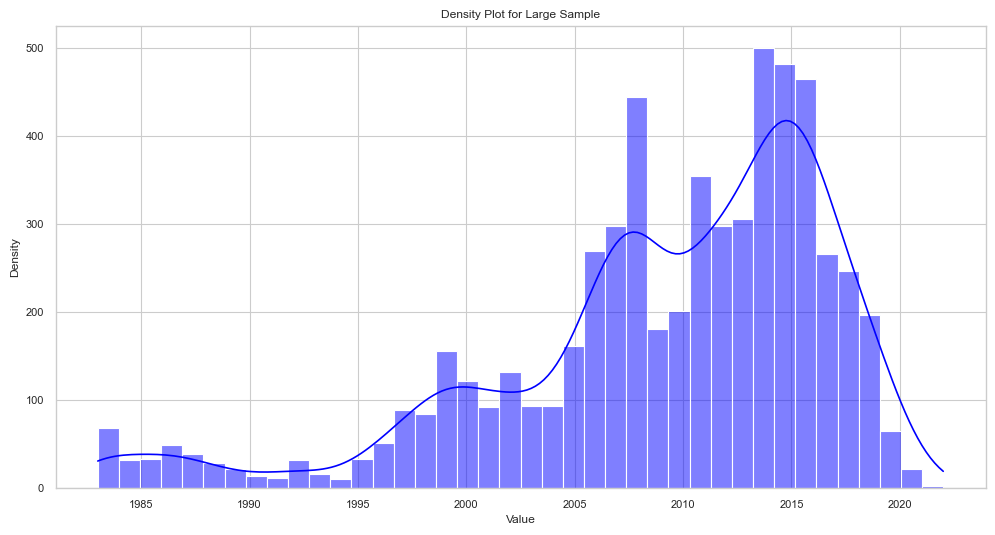

In [7377]:
plt.figure(figsize=(12, 6))
sns.histplot(df["model_car"], kde=True, color='blue')
plt.title('Density Plot for Large Sample')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

        Explanation of the chart : 
        1- from 1983 to 1990 :this  models are fewer in number
        2- from 1990 to 1995 : the number of cars fewer 
        3- from 1995 to 2005 : During this period, the number of cars increases 
        4- from 2005 to 2016 : These years have the largest number of car models


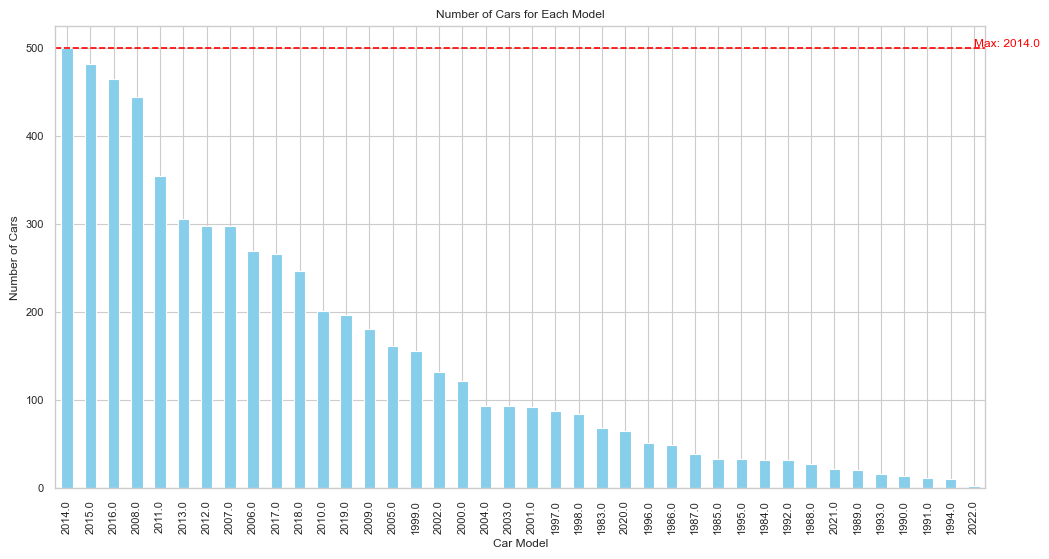

In [7378]:
# print all model car and what the max value  model in data 
cars_count_by_model = df['model_car'].value_counts()
max_count_model = cars_count_by_model.idxmax()
plt.figure(figsize=(12, 6))
cars_count_by_model.plot(kind='bar', color='skyblue')
plt.title('Number of Cars for Each Model')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars')
plt.axhline(cars_count_by_model[max_count_model], color='red', linestyle='--', label=f'Max: {max_count_model}')#line max 
plt.text(len(cars_count_by_model) - 1, cars_count_by_model[max_count_model] + 1,f'Max: {max_count_model}', color='red')
plt.show()


<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">the max number of car for each models is (2013,2014) = 500 cars and smaller 2022 
</div>
 <p style="text-align: center;">
    <img src="https://media.giphy.com/media/xAOWuvXfkNvBjrRlfC/giphy.gif" style="width: 200px; height: 100px;">
</p>


--------

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">    processing price cars 
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>


In [7379]:
df['price_car'].describe()

count      6056.000000
mean      67043.537318
std       57129.686013
min        1111.000000
25%       36000.000000
50%       55000.000000
75%       82624.750000
max      999999.000000
Name: price_car, dtype: float64

In [7380]:
df['price_car'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6056 entries, 0 to 6863
Series name: price_car
Non-Null Count  Dtype  
--------------  -----  
6056 non-null   float64
dtypes: float64(1)
memory usage: 94.6 KB


# chack if price(99999)is Outliers


In [7381]:

highest_price_row = df.loc[df['price_car'].idxmax()]
car_name = highest_price_row['name_car']
car_price = highest_price_row['price_car']
print("name car is : " ,car_name , "max price car " , car_price  )


name car is :  سكودا اوكتافيا max price car  999999.0


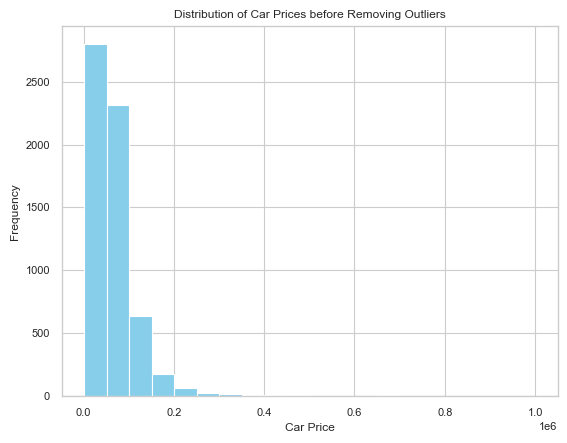

In [7382]:
plt.hist(df['price_car'], bins=20, color='skyblue')
plt.title('Distribution of Car Prices before Removing Outliers')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

In [7383]:
z_scores = stats.zscore(df['price_car'])
threshold = 3
outliers = df['price_car'][abs(z_scores) > threshold]
df = df[abs(z_scores) <= threshold]

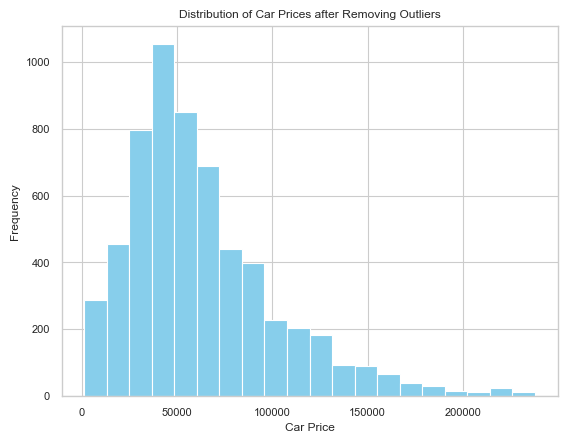

In [7384]:

plt.hist(df['price_car'], bins=20, color='skyblue')
plt.title('Distribution of Car Prices after Removing Outliers')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

In [7385]:
df['price_car'].describe()

count      5973.000000
mean      62747.139796
std       39460.523033
min        1111.000000
25%       36000.000000
50%       55000.000000
75%       80000.000000
max      238000.000000
Name: price_car, dtype: float64

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  We notice that there were irrational values ​​due to the price, and when we read the data, it turns out that the car offered is not at a price, and this is anomalous values.
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>


-------

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">    processing name cars 
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>


In [7386]:
df["name_car"].value_counts()

سكودا اوكتافيا    434
هونداي اكسنت      230
هونداي توسان      218
فولكسفاجن جولف    212
فولكسفاجن بولو    195
                 ... 
اوبل استر           1
تويوتا  تندر        1
فيات 131 ستيشن      1
مازدا 5             1
بيجو 404            1
Name: name_car, Length: 565, dtype: int64

In [7387]:

# إضافة عامودين جديدين
df[['brand', 'type']] = df['name_car'].str.split(n=1, expand=True)



In [7388]:

df["brand"]



0             كيا
1          هونداي
2            بيجو
3           سكودا
4          سوبارو
          ...    
6856         اوبل
6857           بي
6858          كيا
6860       مرسيدس
6863    فولكسفاجن
Name: brand, Length: 5973, dtype: object

In [7389]:

df["type"].unique()

array(['برايد', 'اكسنت', '508', 'اوكتافيا', 'امبريزا', 'ليون', '220',
       '80', 'كوبيه', 'كبينة', 'جولف', 'رام', 'قرطبة', 'جيتس', '208',
       'رابيد', 'فيليسيا', 'تيجوان', '207', 'توسان', 'C250', 'E220',
       '306', 'سبورتاج', 'اوبتيما', 'استرا', 'نملة', 'فابيا', 'بولو',
       'بارتنر', 'سوبيرب', 'اوبترا', 'كرافيل', '2008', 'عريض', 'فوكس',
       'ابيزا', 'كادي', 'كورسا', '2007', 'ريو', 'C4', 'فيرنا', 'سوناتا',
       'C-Elysee', 'GTI', 'A4', '307', 'كودياك', 'سورينتو', 'سول',
       'كرافتر', 'باسات', 'فورتي', 'كليك', 'ديماكس', 'بيرلينجو',
       'ترانزيت', 'سانتافيه', 'كانجو', '3', 'اونو', 'ترانسبورتر', 'بونتو',
       'فيستا', 'i10', 'ام دبليو 520', '١٩٩٨', 'توران', 'زافيرا',
       'بيكانتو', 'اتوس', 'مورننغ', 'C1', 'ماجنتيس', 'جيتا', '305', '412',
       'افانتي', 'E250', 'كوبرا', 'E230', 'i40', 'ام دبليو 525', 'i30',
       'كروز', 'موستانغ', 'بيتل', 'اسكونا', 'دوبلو', 'ام دبليو 535',
       '406', 'لانوس', 'باندا', 'كاديت', 'أماروك', '٢٣٠', 'ام دبليو 320',
       'فيكترا

In [7390]:

df['type'] = df['type'].apply(lambda x: x.replace('أم', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('ام', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('دبل', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('يو', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('فل', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace(' - مع بانورا وبصمه وشاشة - كيرا', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('اضافات', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('a', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('تعديل', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('اف', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('نارية', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('b', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('c', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('d', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('e', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('f', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('j', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('h', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('i', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('g', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('k', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('l', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('m', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('n', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('o', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('p', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('q', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('r', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('s', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('t', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('u', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('v', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('w', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('x', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('y', '').strip() if isinstance(x, str) else x)
df['type'] = df['type'].apply(lambda x: x.replace('z', '').strip() if isinstance(x, str) else x)
 


In [7391]:
df['type'].nunique()

493

In [7392]:
 
df['type'].unique()

array(['برايد', 'اكسنت', '508', 'اوكتيا', 'بريزا', 'لن', '220', '80',
       'كوبيه', 'كبينة', 'جولف', 'ر', 'قرطبة', 'جيتس', '208', 'رابيد',
       'فيليسيا', 'تيجوان', '207', 'توسان', 'C250', 'E220', '306',
       'سبورتاج', 'اوبتيما', 'استرا', 'نملة', 'فابيا', 'بولو', 'بارتنر',
       'سوبيرب', 'اوبترا', 'كريل', '2008', 'عريض', 'فوكس', 'ابيزا',
       'كادي', 'كورسا', '2007', 'C4', 'فيرنا', 'سوناتا', 'C-E', 'GTI',
       'A4', '307', 'كودياك', 'سورينتو', 'سول', 'كرتر', 'باسات', 'فورتي',
       'كليك', 'ديماكس', 'بيرلينجو', 'ترانزيت', 'سانتيه', 'كانجو', '3',
       'اونو', 'ترانسبورتر', 'بونتو', 'فيستا', '10', '520', '١٩٩٨',
       'توران', 'زيرا', 'بيكانتو', 'اتوس', 'مورننغ', 'C1', 'ماجنتيس',
       'جيتا', '305', '412', 'انتي', 'E250', 'كوبرا', 'E230', '40', '525',
       '30', 'كروز', 'موستانغ', 'بيتل', 'اسكونا', 'دوبلو', '535', '406',
       'لانوس', 'باندا', 'كاديت', 'اروك', '٢٣٠', '320', 'فيكترا',
       'تيراكان', 'روم جوليتا', '318', 'هيلاكس', '65C18', 'X5', 'رومستر',
       '

In [7393]:

df['type'].nunique()

493

In [7394]:

df[df["type"]=='GLA200']

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,name_car,model_car,...,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed,brand,type
806,1,0.0,0,1,0,0,0,0,مرسيدس GLA200,2014.0,...,يد ثالثه,1,1,1,3500.0,3.0,1,1,مرسيدس,GLA200
1324,1,1.0,1,1,1,1,1,0,مرسيدس GLA200,2014.0,...,٢,1,3,2,1600.0,5.0,2,3,مرسيدس,GLA200


In [7395]:
df['brand'].unique()

array(['كيا', 'هونداي', 'بيجو', 'سكودا', 'سوبارو', 'سيت', 'مرسيدس',
       'اودي', 'فولكسفاجن', 'Dodge', 'اوبل', 'شفروليه', 'فورد', 'فولفو',
       'ستروين', 'جييب', 'ايسوزو', 'رينو', 'مازدا', 'فيات', 'بي', 'دايو',
       'أفيكو', 'الفا', 'تويوتا', 'ميتسوبيشي', 'سانغ', 'دراجة', 'جي',
       'شاحنة', 'هوندا', 'نيسان', 'داف', 'روفر', 'داتشيا', 'لاندروفر',
       'كاديلاك', 'باص', 'سوزوكي', 'ديهاتسو', 'جاجوار'], dtype=object)

In [7396]:
df['brand'].nunique()


41

In [7397]:
df['brand'] = df['brand'].replace(brand_dict)
df['brand'] 

0              Kia
1          Hyundai
2          Peugeot
3            Skoda
4           Subaru
           ...    
6856          Opel
6857           BMW
6858           Kia
6860      Mercedes
6863    Volkswagen
Name: brand, Length: 5973, dtype: object

In [7398]:
df['brand'].nunique()


41

In [7399]:
df["type"].nunique()

493

In [7400]:
df["type"].unique()

array(['برايد', 'اكسنت', '508', 'اوكتيا', 'بريزا', 'لن', '220', '80',
       'كوبيه', 'كبينة', 'جولف', 'ر', 'قرطبة', 'جيتس', '208', 'رابيد',
       'فيليسيا', 'تيجوان', '207', 'توسان', 'C250', 'E220', '306',
       'سبورتاج', 'اوبتيما', 'استرا', 'نملة', 'فابيا', 'بولو', 'بارتنر',
       'سوبيرب', 'اوبترا', 'كريل', '2008', 'عريض', 'فوكس', 'ابيزا',
       'كادي', 'كورسا', '2007', 'C4', 'فيرنا', 'سوناتا', 'C-E', 'GTI',
       'A4', '307', 'كودياك', 'سورينتو', 'سول', 'كرتر', 'باسات', 'فورتي',
       'كليك', 'ديماكس', 'بيرلينجو', 'ترانزيت', 'سانتيه', 'كانجو', '3',
       'اونو', 'ترانسبورتر', 'بونتو', 'فيستا', '10', '520', '١٩٩٨',
       'توران', 'زيرا', 'بيكانتو', 'اتوس', 'مورننغ', 'C1', 'ماجنتيس',
       'جيتا', '305', '412', 'انتي', 'E250', 'كوبرا', 'E230', '40', '525',
       '30', 'كروز', 'موستانغ', 'بيتل', 'اسكونا', 'دوبلو', '535', '406',
       'لانوس', 'باندا', 'كاديت', 'اروك', '٢٣٠', '320', 'فيكترا',
       'تيراكان', 'روم جوليتا', '318', 'هيلاكس', '65C18', 'X5', 'رومستر',
       '

In [7401]:
df['brand'].iloc[1002]

'Hyundai'

In [7402]:
df["name_car"].iloc[1002]

'هونداي سانتافيه'

In [7403]:
df['brand'].unique()

array(['Kia', 'Hyundai', 'Peugeot', 'Skoda', 'Subaru', 'Seat', 'Mercedes',
       'Audi', 'Volkswagen', 'Dodge', 'Opel', 'Chevrolet', 'Ford',
       'Volvo', 'Citroen', 'Jeep', 'Isuzu', 'Renault', 'Mazda', 'Fiat',
       'BMW', 'Daewoo', 'Iveco', 'Alfa Romeo', 'Toyota', 'Mitsubishi',
       'SsangYong', 'Motorcycle', 'GMC', 'Truck', 'Honda', 'Nissan',
       'DAF', 'Rover', 'Dacia', 'Land Rover', 'Cadillac', 'Bus', 'Suzuki',
       'Daihatsu', 'Jaguar'], dtype=object)

In [7404]:
df['name_car'].iloc[900:1000]

1036      تويوتا كورولا
1037     فولكسفاجن بولو
1038     شفروليه اوبترا
1039     فولكسفاجن جولف
1041          كيا برايد
             ...       
1146    بي ام دبليو 325
1147           بيجو 306
1148         كيا مورننغ
1149            رينو R9
1150         فورد فيستا
Name: name_car, Length: 100, dtype: object

In [7405]:
df['brand'].iloc[900:1000]

1036        Toyota
1037    Volkswagen
1038     Chevrolet
1039    Volkswagen
1041           Kia
           ...    
1146           BMW
1147       Peugeot
1148           Kia
1149       Renault
1150          Ford
Name: brand, Length: 100, dtype: object

In [7406]:
BRAND_count=df
ax2= px.treemap(BRAND_count,path=["brand"],title="Popularity of the bought car brand:")
ax2.show()

In [7407]:
BRAND_avg = df.groupby('brand')['model_car'].mean().reset_index()
fig = px.treemap(BRAND_avg, path=["brand"], title="Average Model Year by Car Brand:", values='model_car')
fig.update_traces(hovertemplate='<b>%{label}</b><br>Average Model Year: %{value:.2f}')
fig.show()


In [7408]:
mean_prices = df.groupby('brand')['price_car'].mean()
max_mean_price_car_type = mean_prices.idxmax()
max_mean_price_value = mean_prices.max()
print(max_mean_price_car_type , max_mean_price_value)



Jaguar 147333.33333333334


In [7409]:
df

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,name_car,model_car,...,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed,brand,type
0,1,1.0,1,1,1,1,0,0,كيا برايد,2008.0,...,يد اولى,1,3,2,1600.0,NaN,2,1,Kia,برايد
1,1,1.0,1,0,1,1,1,0,هونداي اكسنت,2013.0,...,يد اولى,1,3,2,1400.0,5.0,1,3,Hyundai,اكسنت
2,1,1.0,1,1,1,1,1,1,بيجو 508,2013.0,...,يد ثانيه,1,2,2,2000.0,5.0,2,1,Peugeot,508
3,1,1.0,1,1,1,1,1,0,سكودا اوكتافيا,2010.0,...,3,1,1,2,1900.0,5.0,2,3,Skoda,اوكتيا
4,1,1.0,1,1,1,1,1,0,سوبارو امبريزا,1999.0,...,NaN,1,1,2,1600.0,5.0,1,1,Subaru,بريزا
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,1,1.0,0,1,1,1,0,0,اوبل استرا,2006.0,...,1,1,3,2,1000.0,5.0,1,1,Opel,استرا
6857,1,1.0,0,1,1,1,0,0,بي ام دبليو X5,2015.0,...,يد أولى,1,1,2,1600.0,6.0,1,3,BMW,X5
6858,1,1.0,1,1,1,1,1,0,كيا سول,2012.0,...,٢,1,1,2,1200.0,5.0,2,1,Kia,سول
6860,1,1.0,1,0,1,1,1,1,مرسيدس E270,2001.0,...,NaN,1,3,2,2000.0,7.0,1,1,Mercedes,E270


<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  there is no missing values
</div>


<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> The reason we changed the name of the car to the name of the company brand
Because we will depend on the model
 of the car
And other characteristics, for example, the power of the motor
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>


In [7410]:
df=df.drop('name_car' , axis=1)

--------

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  origin_car 
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



In [7411]:
df['origin_car'].head(5)

0    4
1    4
2    4
3    4
4    4
Name: origin_car, dtype: int64

In [7412]:
df["origin_car"].isna().sum()

0

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> there is no missing values
</div>





----

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  
ex_owners
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



In [7413]:
df["ex_owners"].unique()

array(['يد اولى', 'يد ثانيه', '3', nan, 'ثالثه', '٣', '٤', '6',
       'يد ثانية', '٢', 'اولى', '0', 'يد 5', '11', '2', 'ثانية',
       'يد ثالثة', 'يد 2', 'يد تانيه', '1', 'يد أولى', 'يد٢', 'ايد اولى',
       'يد 0', 'يد ثالثه', '---', 'ايد ثانيه', '000', '5', '،',
       'يد أولئ أصحاب سابقون صفر', 'ايد ثانية', '١', 'يد اولي',
       'يد رابعه', 'تانبه', '4', '03', 'يد تانية', '٥', 'أستيراد ألماني',
       'يد اولى الماني', '00', '9', 'يد 8', '7',
       'استيراد مباشر من اوروبا', 'يد عاشرة', 'يد خامساً', 'صفر', 'ثالثة',
       'يد اوله', 'اربعة', 'يد صفر', '00000000', 'مستوردة غير منمرة',
       '10', 'يد تالته', 'مستورد', '000000', 'مستوردة يد اولى',
       'مستوردة غير مرخصة', '8', 'أولى', 'يد 3', 'استيراد مباشر', '.',
       'تانيه', 'يد 4', 'يداولى', 'غير منمرمستوردة', 'E', '1000', 'صفرر',
       'مش منمرة', 'يد خامسه', 'خصوصي', 'خامسة', 'ثانيه', 'يد ٢', 'رابعه',
       'يدثانية', 'يد اةلي', '0000', '٠٠', 'مش منمره', 'يد أولئ',
       'مش منمر', 'يد ثالث', 'استراد شخصي', 'يدثالث

In [7414]:
def convert_arabic_to_numeric(text):
    if pd.isna(text):   
        return text
    arabic_numerals = "٠١٢٣٤٥٦٧٨٩"
    numeric_numerals = "0123456789"
    translation_table = str.maketrans(arabic_numerals, numeric_numerals)
    return text.translate(translation_table)
df['ex_owners'] = df['ex_owners'].apply(convert_arabic_to_numeric)
 

In [7415]:
import numpy as np

def map_ex_owners(df_column):
    minus = df_column.str.contains('شط', na=False)
    df_column.loc[minus] = '-1'

    new = df_column.str.contains('٠|Zero|00|O|0', na=False)
    df_column.loc[new] = '0'

    first = df_column.str.contains('١|صفر|ست|ا|وال|ول|1|منم', na=False)
    df_column.loc[first] = '1'

    sec = df_column.str.contains('تان|ثان|٢|2|ثن', case=False, na=False)
    df_column.loc[sec] = '2'

    third = df_column.str.contains('3|٣', case=False, na=False)
    df_column.loc[third] = '3'

    four = df_column.str.contains('4|٤', case=False, na=False)
    df_column.loc[four] = '4'

    five = df_column.str.contains('خمس|٥|5', case=False, na=False)
    df_column.loc[five] = '5'

    sixth = df_column.str.contains('6|٦', case=False, na=False)
    df_column.loc[sixth] = '6'

    seven = df_column.str.contains('7|٧', case=False, na=False)
    df_column.loc[seven] = '7'

    eight = df_column.str.contains('8|٨', case=False, na=False)
    df_column.loc[eight] = '8'
    ead = df_column.str.contains('8|٨', case=False, na=False)

    values_to_replace = ['---', '،', '.', ' ', 'خصوصي', '**********', '-', 'سحب شركة', '..', '......',
                         '?', '...', '؟', 'للبيع', '******', '.........', '@', 'يد', '....', 'يد 9', 'E', "نعم", "********"]
    df_column = df_column.replace(values_to_replace, np.nan)

    return df_column

# Example usage:
df['ex_owners'] = map_ex_owners(df['ex_owners'])


/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipykernel_19687/3781344383.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipykernel_19687/3781344383.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipykernel_19687/3781344383.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipyke

In [7416]:
values_to_replace = ['---', '،', '.', ' ', 'خصوصي', '**********', '-', 'سحب شركة', '..', '......',
                     '?', '...', '؟', 'للبيع', '******', '.........', '@', 'يد', '....', 'يد 9' , 'E' , "نعم" ,"********"]

df['ex_owners'] = df['ex_owners'].replace(values_to_replace, np.nan)


In [7417]:
df["ex_owners"].unique()

array(['1', '3', nan, '4', '6', '2', '0', '5', '9', '8', '7'],
      dtype=object)

In [7418]:
df["ex_owners"].replace({ np.nan: '9999'}, inplace=True)


In [7419]:
df["ex_owners"].unique()

array(['1', '3', '9999', '4', '6', '2', '0', '5', '9', '8', '7'],
      dtype=object)

In [7420]:
df['ex_owners'] = pd.to_numeric(df['ex_owners'], errors='coerce')

In [7421]:
df['ex_owners']

0          1
1          1
2          1
3          3
4       9999
        ... 
6856       1
6857       1
6858       2
6860    9999
6863       1
Name: ex_owners, Length: 5973, dtype: int64

In [7422]:
df["ex_owners"].unique()

array([   1,    3, 9999,    4,    6,    2,    0,    5,    9,    8,    7])

In [7423]:

df['ex_owners'] = df['ex_owners'].astype(int)
df["ex_owners"].unique()

array([   1,    3, 9999,    4,    6,    2,    0,    5,    9,    8,    7])

In [7424]:
df["ex_owners"].isna().sum()

0

In [7425]:
df["ex_owners"]

0          1
1          1
2          1
3          3
4       9999
        ... 
6856       1
6857       1
6858       2
6860    9999
6863       1
Name: ex_owners, Length: 5973, dtype: int64

In [7426]:
df['ex_owners'] = df['ex_owners'].replace(9999, np.nan)


In [7427]:
df["ex_owners"].unique()

array([ 1.,  3., nan,  4.,  6.,  2.,  0.,  5.,  9.,  8.,  7.])

In [7428]:
df["ex_owners"].describe()

count    4504.000000
mean        1.813943
std         1.600722
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: ex_owners, dtype: float64

In [7429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5973 entries, 0 to 6863
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   air_conditioner     5973 non-null   int64  
 1   central_closing     5973 non-null   float64
 2   alarm_devise        5973 non-null   int64  
 3   CD_recorder         5973 non-null   int64  
 4   leather_upholstery  5973 non-null   int64  
 5   air_cushion         5973 non-null   int64  
 6   magnesium_rims      5973 non-null   int64  
 7   sunroof             5973 non-null   int64  
 8   model_car           5973 non-null   float64
 9   price_car           5973 non-null   float64
 10  fuel_type           5973 non-null   object 
 11  origin_car          5973 non-null   int64  
 12  ex_owners           4504 non-null   float64
 13  car_license         5973 non-null   int64  
 14  lime_type           5973 non-null   int64  
 15  glass               5973 non-null   int64  
 16  motor_

In [7430]:
#Predict missing values to colume [ex_owners]
def impute_and_predict(df, target_column, columns_to_drop=['brand', 'fuel_type' , "brand" , "type"]):
    df_without_null = df.dropna(subset=[target_column])
    X = df_without_null.drop(columns=columns_to_drop + [target_column], axis=1)
    y = df_without_null[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    
    model = RandomForestRegressor()
    model.fit(X_train_imputed, y_train)
    
    missing_values = df[df[target_column].isnull()].drop(columns=columns_to_drop + [target_column], axis=1)
    
    if not missing_values.empty:
        missing_values_imputed = pd.DataFrame(imputer.transform(missing_values), columns=missing_values.columns)
        predicted_values = model.predict(missing_values_imputed)
        df.loc[df[target_column].isnull(), target_column] = predicted_values
    else:
        print("No missing data")
    
    if not X_test.empty:
        X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
        y_pred = model.predict(X_test_imputed)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error on the test set: {mae}")


In [7431]:
impute_and_predict(df, 'ex_owners')

Mean Absolute Error on the test set: 1.1639811056498073


In [7432]:
df["ex_owners"].describe()

count    5973.000000
mean        1.865075
std         1.445898
min         0.000000
25%         1.000000
50%         1.145000
75%         2.470000
max         9.000000
Name: ex_owners, dtype: float64

In [7433]:
df.isna().sum()

air_conditioner         0
central_closing         0
alarm_devise            0
CD_recorder             0
leather_upholstery      0
air_cushion             0
magnesium_rims          0
sunroof                 0
model_car               0
price_car               0
fuel_type               0
origin_car              0
ex_owners               0
car_license             0
lime_type               0
glass                   0
motor_power             0
passengers            745
payment_method          0
displayed               0
brand                   0
type                    0
dtype: int64

In [7434]:
df["ex_owners"].unique()


array([1.        , 3.        , 2.25      , 4.3       , 3.38      ,
       1.77      , 1.66      , 4.        , 6.        , 3.36      ,
       2.        , 1.25      , 0.        , 5.        , 1.88      ,
       1.5       , 1.79      , 1.73      , 1.37      , 2.005     ,
       1.7375    , 2.31      , 2.21      , 1.7       , 1.32      ,
       2.47      , 1.45      , 3.07      , 1.19      , 3.22      ,
       1.86      , 2.44      , 2.42      , 1.12      , 2.01      ,
       1.21      , 2.73      , 1.89      , 3.91      , 1.27      ,
       2.78      , 1.8       , 1.93      , 0.9525    , 2.94      ,
       9.        , 2.8       , 1.78      , 8.        , 1.39      ,
       1.67      , 7.        , 1.54      , 1.24      , 2.18      ,
       2.07      , 0.88      , 1.98      , 2.96      , 1.06      ,
       2.5       , 3.05      , 1.145     , 2.23      , 1.3       ,
       1.72      , 3.12      , 3.15      , 2.22      , 2.85      ,
       2.16      , 1.94      , 0.98      , 0.91      , 2.59   

In [7435]:
df['ex_owners'] = df['ex_owners'].astype(int)

In [7436]:
df['ex_owners'].unique()

array([1, 3, 2, 4, 6, 0, 5, 9, 8, 7])

In [7437]:
df['ex_owners'].std()

1.4532930162339528




<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> I used a model to predict the missing values, and I used the tree type to make the prediction more accurate.
I predicted and took the average prediction so that the data would not be widely dispersed
</div>


------

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  passengers 
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



In [7438]:
df['passengers']

0       NaN
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
6856    5.0
6857    6.0
6858    5.0
6860    7.0
6863    NaN
Name: passengers, Length: 5973, dtype: float64

In [7439]:
df['passengers'].unique()
num_of=df['passengers']
num_of.unique()

array([nan,  5.,  6.,  2.,  9.,  7.,  8.,  4.,  3., 10., 22.])

In [7440]:
std_passengers = df['passengers'].std()
print("Std of passengers:", std_passengers)


Std of passengers: 0.9618521782469912


In [7441]:
rows_with_104_passengers = df[df['passengers'] == 104]
rows_with_104_passengers

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,model_car,price_car,...,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed,brand,type


In [7442]:
rows_with_104_passengers = df[df['passengers'] == 22]
rows_with_104_passengers

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,model_car,price_car,...,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed,brand,type
4634,1,1.0,1,0,1,0,0,0,2005.0,27000.0,...,1,2,1,1,3000.0,22.0,1,1,Skoda,اوكتيا


In [7443]:
df.isna().sum()

air_conditioner         0
central_closing         0
alarm_devise            0
CD_recorder             0
leather_upholstery      0
air_cushion             0
magnesium_rims          0
sunroof                 0
model_car               0
price_car               0
fuel_type               0
origin_car              0
ex_owners               0
car_license             0
lime_type               0
glass                   0
motor_power             0
passengers            745
payment_method          0
displayed               0
brand                   0
type                    0
dtype: int64

In [7444]:
missing_values = df[df["passengers"].isna()]
missing_values

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,model_car,price_car,...,ex_owners,car_license,lime_type,glass,motor_power,passengers,payment_method,displayed,brand,type
0,1,1.0,1,1,1,1,0,0,2008.0,44000.0,...,1,1,3,2,1600.0,NaN,2,1,Kia,برايد
6,1,1.0,1,1,1,1,1,0,1999.0,50000.0,...,4,1,3,2,2200.0,NaN,2,3,Mercedes,220
12,1,1.0,1,1,1,1,0,0,2001.0,25000.0,...,4,1,1,2,1900.0,NaN,2,3,Seat,قرطبة
20,1,1.0,1,1,1,1,1,0,2012.0,68000.0,...,1,1,3,2,2000.0,NaN,2,3,Hyundai,توسان
22,1,1.0,1,1,1,1,1,1,2015.0,175000.0,...,0,1,3,2,2500.0,NaN,1,1,Mercedes,C250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791,0,0.0,1,1,0,1,1,0,2018.0,110000.0,...,3,1,1,2,2200.0,NaN,1,3,Kia,سبورتاج
6794,0,1.0,0,0,1,0,1,0,1990.0,4500.0,...,3,1,1,1,1300.0,NaN,1,1,Mitsubishi,لانسر
6795,0,0.0,0,0,0,0,0,0,1997.0,27000.0,...,1,1,1,2,1500.0,NaN,2,1,Volkswagen,جولف
6843,0,0.0,0,0,0,0,1,0,2018.0,71990.0,...,3,1,1,2,1900.0,NaN,2,1,Seat,لن


In [7445]:
int (df[df["origin_car"]==1]["passengers"].mean())

5

In [7446]:
df[df["origin_car"]==1]["passengers"].isna().sum()

6

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> when origin_car == 1  (حكومي)  , we have 6 missing value in columne passengers

</div>


In [7447]:
int (df[df["origin_car"]==2]["passengers"].mean())

4

In [7448]:
df[df["origin_car"]==2]["passengers"].isna().sum()

15

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> when origin_car == 2 (تأجير)  , we have 15 missing value in columne passengers 


</div>


In [7449]:
int (df[df["origin_car"]==3]["passengers"].mean())

4

In [7450]:
df[df["origin_car"]==3]["passengers"].isna().sum()

7

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">when origin_car == 3 (تدريب)  , we have 7 missing value in columne passengers 


</div>


In [7451]:
int (df[df["origin_car"]==4]["passengers"].mean())

5

In [7452]:
df[df["origin_car"]==5]["passengers"].isna().sum()

75


<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">when origin_car == 4 (خصوصي)  , we have 571 missing value in columne passengers 

</div>



In [7453]:
int (df[df["origin_car"]==6]["passengers"].mean())

4

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">when origin_car == 5 (عمومي)  , we have 59 missing value in columne passengers 
</div>



In [7454]:
int (df[df["origin_car"]==5]["passengers"].mean())

5

<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">when origin_car == 6 (تجاري)  , we have 26 missing value in columne passengers 
</div>



In [7455]:
int (df[df["origin_car"]==6]["passengers"].mean())

4

In [7456]:
df["passengers"].replace(4, 5, inplace=True)


<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">There is no car with 4 passengers ,Rather, the number of passengers is 4 and one driver, so it becomes 5
</div>



In [7457]:
df["passengers"].replace({22: 5, 104: 10}, inplace=True)


<div style="padding: 10px; background-color: #F52887; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;"> this value is outlier [104 , 22 ]
</div>



In [7458]:
df["passengers"].value_counts()

5.0     4299
7.0      535
8.0      152
3.0       94
6.0       81
2.0       42
9.0       15
10.0      10
Name: passengers, dtype: int64

In [7459]:
df['passengers'].fillna(5, inplace=True)
df["passengers"].replace({22: 5, 104: 10}, inplace=True)


In [7460]:
df["passengers"].unique()

array([ 5.,  6.,  2.,  9.,  7.,  8.,  3., 10.])

In [7461]:
std_passengers = df['passengers'].std()
print("Standard Deviation of Passengers:", std_passengers)


Standard Deviation of Passengers: 0.8683858092997699


In [7462]:
df["passengers"].isna().sum()

0

In [7463]:
df["passengers"].unique()

array([ 5.,  6.,  2.,  9.,  7.,  8.,  3., 10.])

In [7464]:
df["passengers"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5973 entries, 0 to 6863
Series name: passengers
Non-Null Count  Dtype  
--------------  -----  
5973 non-null   float64
dtypes: float64(1)
memory usage: 93.3 KB


In [7465]:
df['passengers'] = df['passengers'].astype(int)

----


<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  power motor  
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



In [7466]:
df["motor_power"].describe()

count    5973.000000
mean     1741.007366
std       595.942319
min       106.000000
25%      1400.000000
50%      1600.000000
75%      2000.000000
max      9000.000000
Name: motor_power, dtype: float64

In [7467]:

z_scores = stats.zscore(df['motor_power'])
threshold = 3## 
outliers = df['motor_power'][abs(z_scores) > threshold]
df = df[abs(z_scores) <= threshold]

In [7468]:

df["motor_power"].describe()


count    5908.00000
mean     1705.25914
std       470.02904
min       106.00000
25%      1400.00000
50%      1600.00000
75%      2000.00000
max      3500.00000
Name: motor_power, dtype: float64

In [7469]:

min=df['motor_power'].min()
max =df['motor_power'].max()

In [7470]:
max

3500.0

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>

 
</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/nNOAPjUdo4mpZFkDf8/giphy.gif" style="width: 500px; height: 250px;">
</p>
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> Display data  </div>




 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> ------------------------------------------------------------------------------------------------------------------------------------------------------</div>

 <div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  price_car 
 


</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



In [7471]:
df["price_car"].describe()

count      5908.000000
mean      62713.230704
std       39466.178355
min        1111.000000
25%       36000.000000
50%       55000.000000
75%       80000.000000
max      238000.000000
Name: price_car, dtype: float64

/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipykernel_19687/1353023272.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




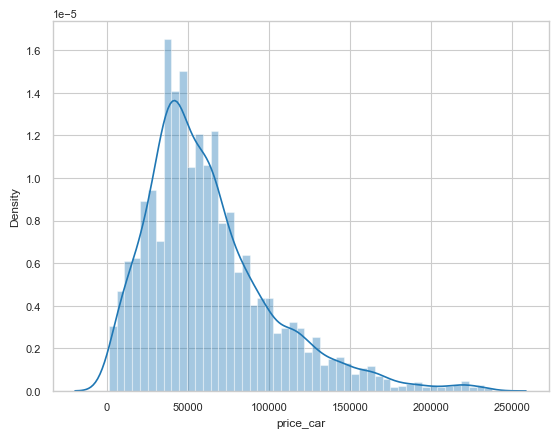

In [7472]:
sns.distplot(df['price_car'],kde=True)
plt.show()

            Price distribution plot is right skewed 
            maximum number of cars are in range price of
            30000 to 60000

----

## Visualise different car names(brand)


In [7473]:
brand_df=pd.DataFrame(df['brand'].value_counts()).reset_index().rename(columns={'index':'brand','brand': 'count'})

In [7474]:
brand_df.head()

,brand,count
0,Volkswagen,1013
1,Hyundai,908
2,Kia,729
3,Skoda,660
4,Opel,427


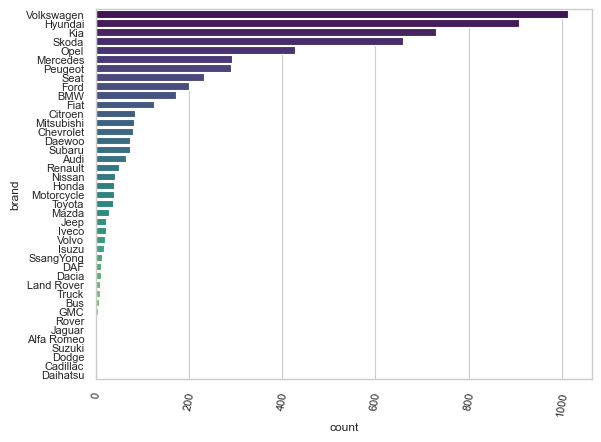

In [7475]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.9)  
plot = sns.barplot(y='brand', x='count', data=brand_df, palette='viridis')  
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

## Statistics of cars for sale:
The Volkswagen is the most widely available and most widespread car in Palestine


The Daihatsu ,Cadillac  is the least widely available and least common car in Palestine

----

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  Fuel type 


</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



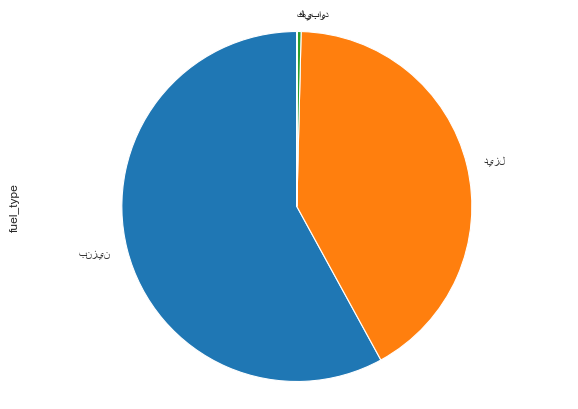

In [7476]:
plot = df['fuel_type'].value_counts().plot.pie(startangle=90, figsize=(7, 5))
plt.axis('equal')  

plt.show()

#### Most of the car has petrol fuel


----



<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  passengers


</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



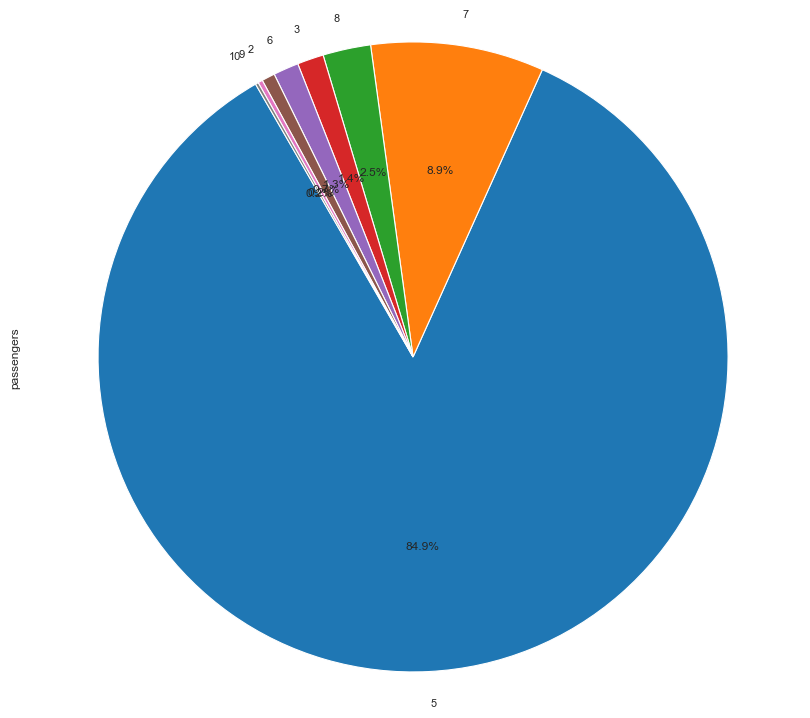

In [7477]:
plot = df['passengers'].value_counts().plot.pie(autopct='%1.1f%%', startangle=120, figsize=(10,9))
plt.axis('equal')  

plt.show()

/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipykernel_19687/1593640805.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/mt/p77p8b6n2sbdwdd7mqm0yz280000gp/T/ipykernel_19687/1593640805.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Price distribution of cars having 5 passengers')

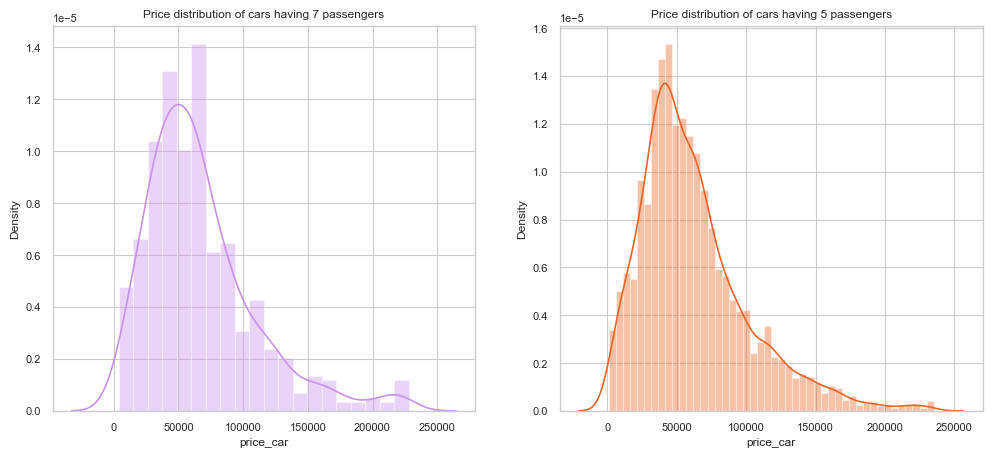

In [7478]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df.passengers== 7)]["price_car"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having 7 passengers')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df.passengers == 5)]['price_car'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having 5 passengers')


                The graph shows car price distribution based on passenger capacity. 
                5 passenger cars concentrate more on lower prices [50,000$], with a steeper slope. 
                7 passenger cars have a peak at $100,000, indicating a higher number in that price range

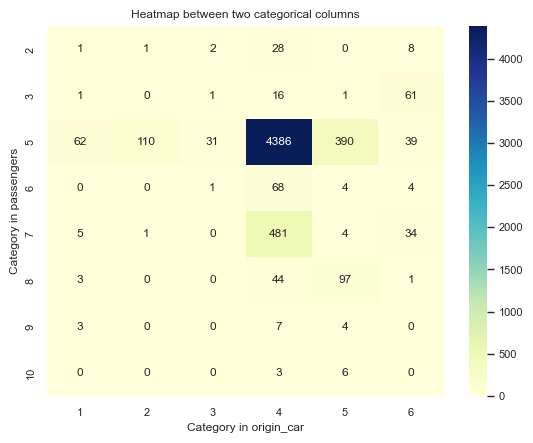

In [7479]:
ct_counts = pd.crosstab(df['passengers'], df['origin_car'])
sns.heatmap(ct_counts, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Category in origin_car')
plt.ylabel('Category in passengers')
plt.title('Heatmap between two categorical columns')
plt.show()



## The cars with 5 seats for passengers and classified as private in the dataset are those that have both a seat count of 5 and a car type labeled as 'Private'. 

------

<div style="padding: 10px; background-color: #808080; margin: 0; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: left; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 60%; float: left;">  origin_car


</div>
<p style="text-align: center;">
    <img src="https://media.giphy.com/media/xBq8N1Opc2FEeQZVcY/giphy.gif" style="width: 200px; height: 100px;">
</p>



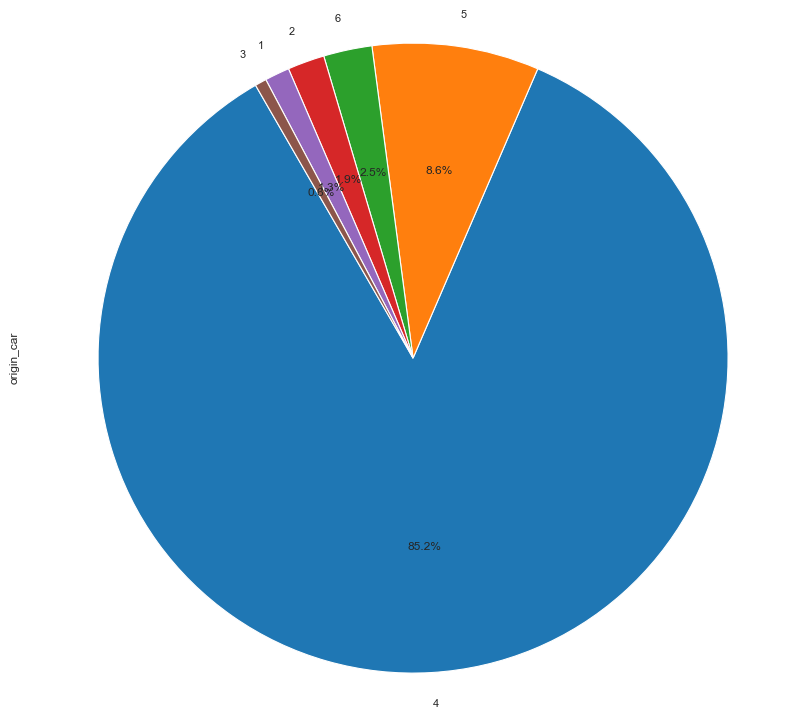

In [7480]:
plot = df['origin_car'].value_counts().plot.pie(autopct='%1.1f%%', startangle=120, figsize=(10,9))
plt.axis('equal')  

plt.show()

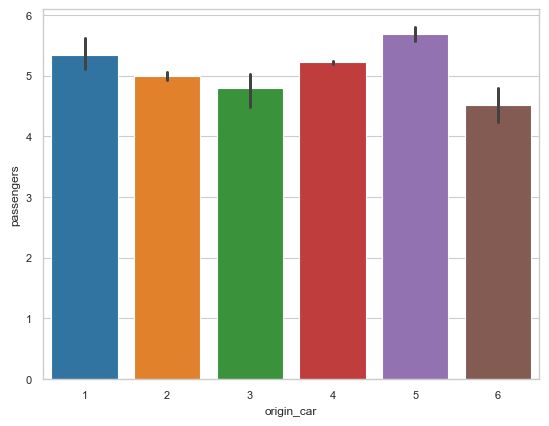

In [7481]:
sns.barplot(x='origin_car', y='passengers', data=df)
plt.show()

                    The highest value is public. Therefore, we understand that the most advertised car for sale is of type public


 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> Increased weight of additions
   </div>

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>


In [7482]:
df["sunroof"] = df["sunroof"].replace(1, 30)
columns_to_sum = ['air_conditioner', 'central_closing', 'alarm_devise', 'CD_recorder', 
                  'leather_upholstery', 'air_cushion', 'magnesium_rims', 'sunroof']
df['additions'] = df.apply(lambda row: row[columns_to_sum].sum(), axis=1)


In [7483]:
df['additions']

0        6.0
1        6.0
2       37.0
3        7.0
4        7.0
        ... 
6856     5.0
6857     5.0
6858     7.0
6860    36.0
6863     6.0
Name: additions, Length: 5908, dtype: float64

In [7484]:

df['additions'] = df['additions'] ** 2

In [7485]:
average_price = df['price_car'].mean()


In [7486]:

df['additionsPlus'] = df.apply(lambda row: 1 if (row['additions'] > 36) and (row['price_car'] > average_price) else 0, axis=1)

df['additionsPlus'].value_counts()

0    4566
1    1342
Name: additionsPlus, dtype: int64

-------




 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;">  Knowing the relationships between columns and increasing the relationship

   </div>

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>


In [7487]:
linregress(df['price_car'], df['model_car'])


LinregressResult(slope=0.00011766639213435286, intercept=2001.6143284472869, rvalue=0.5764027171814636, pvalue=0.0, stderr=2.1706503213220317e-06, intercept_stderr=0.16083720466593754)

In [7488]:
linregress(df['price_car'], df['additionsPlus'])


LinregressResult(slope=5.271167331578006e-06, intercept=-0.1034223053217635, rvalue=0.49646815238631964, pvalue=0.0, stderr=1.1992670420175692e-07, intercept_stderr=0.008886127663741614)

In [7489]:
linregress(df['price_car'], df['additions'])


LinregressResult(slope=-0.0002458932161942554, intercept=389.86490152996174, rvalue=-0.016915386400080383, pvalue=0.1936030429864849, stderr=0.00018912797035933144, intercept_stderr=14.013686948071223)

-----

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> one hot   </div>

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>


In [7490]:
df = pd.get_dummies(df, columns=['fuel_type'], prefix='fuel_type')
df

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,model_car,price_car,...,payment_method,displayed,brand,type,additions,additionsPlus,fuel_type_بنزين,fuel_type_ديزل,fuel_type_كهرباء,fuel_type_هايبرد
0,1,1.0,1,1,1,1,0,0,2008.0,44000.0,...,2,1,Kia,برايد,36.0,0,1,0,0,0
1,1,1.0,1,0,1,1,1,0,2013.0,58000.0,...,1,3,Hyundai,اكسنت,36.0,0,1,0,0,0
2,1,1.0,1,1,1,1,1,30,2013.0,40000.0,...,2,1,Peugeot,508,1369.0,0,1,0,0,0
3,1,1.0,1,1,1,1,1,0,2010.0,70000.0,...,2,3,Skoda,اوكتيا,49.0,1,0,1,0,0
4,1,1.0,1,1,1,1,1,0,1999.0,33000.0,...,1,1,Subaru,بريزا,49.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,1,1.0,0,1,1,1,0,0,2006.0,29000.0,...,1,1,Opel,استرا,25.0,0,1,0,0,0
6857,1,1.0,0,1,1,1,0,0,2015.0,238000.0,...,1,3,BMW,X5,25.0,0,0,1,0,0
6858,1,1.0,1,1,1,1,1,0,2012.0,61500.0,...,2,1,Kia,سول,49.0,0,1,0,0,0
6860,1,1.0,1,0,1,1,1,30,2001.0,45000.0,...,1,1,Mercedes,E270,1296.0,0,0,1,0,0


In [7491]:
df = pd.get_dummies(df, columns=['brand'], prefix=None)

In [7492]:
df = pd.get_dummies(df, columns=['type'], prefix=None)


-------



 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> MinMaxScaler  </div>

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>


In [7493]:
from sklearn.preprocessing import MinMaxScaler


In [7494]:
# def normalize_price_column(df, column_name):
#     original_min = df[column_name].min()
#     original_max = df[column_name].max()
#     df['normalized_' + column_name] = np.interp(df[column_name], (original_min, original_max), (0, 1))
#     return original_max, original_min

# original_max , original_min = normalize_price_column(df, 'price_car')


In [7495]:

priceScaler = MinMaxScaler()

# Fit and transform the data using the scaler
df['price_car_normalized'] = priceScaler.fit_transform(df[['price_car']])
with open('priceScaler.pkl', 'wb') as file:
    pickle.dump(priceScaler, file)


In [7496]:
motorScaler = MinMaxScaler()

# Fit and transform the data using the scaler
df['scales_motor'] = motorScaler.fit_transform(df[['motor_power']])


In [7497]:
with open('priceScaler.pkl', 'wb') as file:
    pickle.dump(priceScaler, file)
with open('motorscaler.pkl', 'wb') as file:
    pickle.dump(motorScaler, file)

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> ------------------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 


In [7498]:
df['model_car'] = df['model_car'].astype(int)

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> ------------------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 


In [7499]:
# def normalize_price_column(df, column_name):
#     original_min = df[column_name].min()
#     original_max = df[column_name].max()
#     df['normalized_' + column_name] = np.interp(df[column_name], (original_min, original_max), (0, 1))
#     return original_max, original_min

# original_max , original_min = normalize_price_column(df, 'price_car')


In [7500]:
df.to_csv('finalty_data.csv', index=False)


In [7501]:
df['price_car_normalized'].describe()

count    5908.000000
mean        0.260047
std         0.166602
min         0.000000
25%         0.147280
50%         0.227486
75%         0.333021
max         1.000000
Name: price_car_normalized, dtype: float64

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div> 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> MODEL   </div>

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>


In [7502]:
y =  df['price_car_normalized']
X = df.drop(columns=['price_car'  ,"price_car_normalized" , "motor_power"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.0065530532415140124
R-squared: 0.7628512609559847


In [7503]:
import pickle 
with open('RandomForestRegressor_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>

 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> test   </div>




 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>

In [7505]:

x = pd.DataFrame([[0] * len(df.columns)], columns=df.columns)


In [7506]:
x["brand_Volkswagen"]=1 
x["type_جولف"]=1
x["model_car"]=2021
x["fuel_type_بنزين"] = 1
x["lime_type"] =3
x["motor_power"]=1999
x["payment_method"]= 1 
x["alarm_devise"]= 1
x["air_conditioner"]= 1
x["CD_recorder"]= 1
x["sunroof"]= 1
x["leather_upholstery"]= 1
x["magnesium_rims"]= 1
x["central_closing"]= 1
x["passengers"]= 5
x["air_cushion"]= 1
x["glass"] = 2




In [7507]:
x["sunroof"] = x["sunroof"].replace(1, 30)
x['price_car'] = 150000


In [7508]:

columns_to_sum = ['air_conditioner', 'central_closing', 'alarm_devise', 'CD_recorder', 
                  'leather_upholstery', 'air_cushion', 'magnesium_rims', 'sunroof']


In [7509]:

x['additions'] = x.apply(lambda row: row[columns_to_sum].sum(), axis=1)


In [7510]:
x['additions']


0    37
Name: additions, dtype: int64

In [7511]:
x['additions'] = x['additions'] ** 2


In [7512]:
x["additions"]


0    1369
Name: additions, dtype: int64

In [7513]:
x['additionsPlus'] = x.apply(lambda row: 1 if (row['additions'] > 36) and (row['price_car'] > average_price) else 0, axis=1)


In [7514]:
x['additionsPlus'] 


0    1
Name: additionsPlus, dtype: int64

In [7515]:
x['scales_motor'] = motorScaler.fit_transform(x[['motor_power']])


In [7516]:
columns_to_drop = ['price_car'  ,"price_car_normalized" , "motor_power"]

x = x.drop(columns=columns_to_drop)


In [7517]:

y_pred = rf_model.predict(x)


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [7518]:
extra_columns_in_x = set(x.columns) - set(df.columns)
x = x.drop(columns=list(extra_columns_in_x))
x

,air_conditioner,central_closing,alarm_devise,CD_recorder,leather_upholstery,air_cushion,magnesium_rims,sunroof,model_car,origin_car,...,type_٢٠١٠,type_٢٠١٢,type_٢٠١٥,type_٢٠١٦,type_٢٠١٩,type_٢١٢,type_٢٣٠,type_٣٣٠,type_ڤيڤارو,scales_motor
0,1,1,1,1,1,1,1,30,2021,0,...,0,0,0,0,0,0,0,0,0,0.0


In [7519]:
y_pred

array([0.53693443])

In [7520]:
predicted_price_original_scale = price_scaler.inverse_transform(y_pred.reshape(-1, 1))


In [7521]:
predicted_price_original_scale[0, 0]


128304.86000000002

 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>

 
</div>
 
 
<div style="padding: 10px; background-color: #960018; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> API   </div>




 
<div style="padding: 10px; background-color: #0000; margin: 0 auto; color: #e7d954; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px; overflow: hidden; font-weight: 1000; width: 100%;"> --------------------------------------------------------------------------------------------------------------------------------------------------------</div>

In [7522]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

In [7523]:
app = Flask(__name__)
excluded_columns = ['price_car', 'price_car_normalized','additions','additionsPlus'] 
feature_names = [col for col in df.columns if col not in excluded_columns]


In [7524]:
len(feature_names)

552

In [7525]:
@app.route('/predict', methods=['POST'])
def predict():
    try:
        default_data = pd.DataFrame([[0] * len(feature_names)], columns=feature_names)
        data = request.get_json(force=True)
        app.logger.info(f"Received data: {data}")
        input_data = pd.DataFrame([data])
        features_used_during_training = input_data.columns
        input_data_selected = input_data[features_used_during_training]

        # Update the default_data with the user input
        default_data.update(input_data_selected)

        # Scale the 'Motor power' feature using the motor scaler
        default_data['motor_power'] = motorScaler.transform(default_data[['motor_power']])

        # Make predictions using the model
        predictions = rf_model.predict(default_data)

        # Inverse transform the normalized predictions
        original_scale_predictions = priceScaler.inverse_transform(predictions.reshape(-1, 1))

        # Log data before prediction
        app.logger.info(f"Predicting with data: {default_data}")

        # Return the unnormalized predictions
        return jsonify({'predicted_price': original_scale_predictions.tolist()})

    except Exception as e:
        app.logger.error(f"Error: {str(e)}")
        return jsonify({'error': f'Internal Server Error: {str(e)}'})

In [7526]:
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
